In [1]:
import pandas as pd


In [42]:
df = pd.read_csv("./base_acoes_classificacao_balanceada.csv")

In [43]:
from sklearn.calibration import LabelEncoder

In [73]:
L = LabelEncoder()

In [74]:
y = L.fit_transform(df["acao_recomendada"])
x = df.drop(columns=["acao_recomendada"])

In [47]:
y, x

(array([2, 2, 1, 0, 2, 2, 1, 1, 0, 1, 2, 0, 2, 0, 1, 2, 2, 2, 1, 1, 0, 1,
        2, 2, 1, 0, 2, 2, 1, 2, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 2, 0,
        0, 0, 2, 2, 1, 2, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 2, 0, 0, 1, 1, 0,
        0, 2, 0, 1, 1, 1, 2, 1, 1, 2, 0, 0, 0, 2, 1, 1, 0, 1, 0, 1, 1, 0,
        0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 0, 2, 0, 0, 1, 2, 2, 1, 0, 1, 0,
        1, 2, 0, 2, 2, 1, 1, 2, 1, 2, 0, 1, 1, 1, 1, 2, 0, 1, 1, 2, 1, 1,
        1, 1, 2, 2, 1, 1, 1, 0, 1, 1, 1, 1, 2, 2, 1, 0, 0, 0, 2, 1, 2, 1,
        2, 2, 2, 0, 1, 0, 2, 1, 0, 0, 0, 1, 2, 2, 1, 0, 0, 2, 2, 0, 0, 2,
        1, 0, 2, 1, 2, 0, 2, 2, 1, 2, 2, 1, 0, 0, 0, 1, 2, 2, 2, 0, 2, 2,
        0, 2, 0, 1, 0, 2, 1, 2, 2, 1, 0, 1, 1, 2, 0, 0, 2, 0, 0, 2, 1, 0,
        1, 2, 2, 1, 0, 2, 1, 0, 2, 2, 0, 2, 2, 2, 1, 0, 0, 0, 2, 2, 2, 2,
        1, 0, 2, 1, 1, 2, 2, 0, 1, 0, 1, 0, 1, 1, 0, 0, 2, 0, 0, 0, 2, 0,
        0, 1, 2, 1, 2, 2, 0, 0, 1, 1, 2, 1, 1, 0, 0, 2, 2, 0, 1, 2, 1, 2,
        1, 1, 1, 0, 0, 2, 1, 2, 0, 1, 

In [6]:
from sklearn.model_selection import  train_test_split

In [48]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=42)

In [49]:
from sklearn.ensemble import  RandomForestClassifier

In [50]:
model = RandomForestClassifier()

In [51]:
model.fit(x_treino, y_treino)

RandomForestClassifier()

In [52]:
y_prob = model.predict(x_teste)

In [53]:
from sklearn.metrics import accuracy_score, confusion_matrix


accuracy = accuracy_score(y_teste, y_prob)
matrix = confusion_matrix(y_teste, y_prob) 

In [54]:
accuracy, matrix

(0.9666666666666667,
 array([[29,  0,  0],
        [ 0, 22,  0],
        [ 1,  2, 36]]))

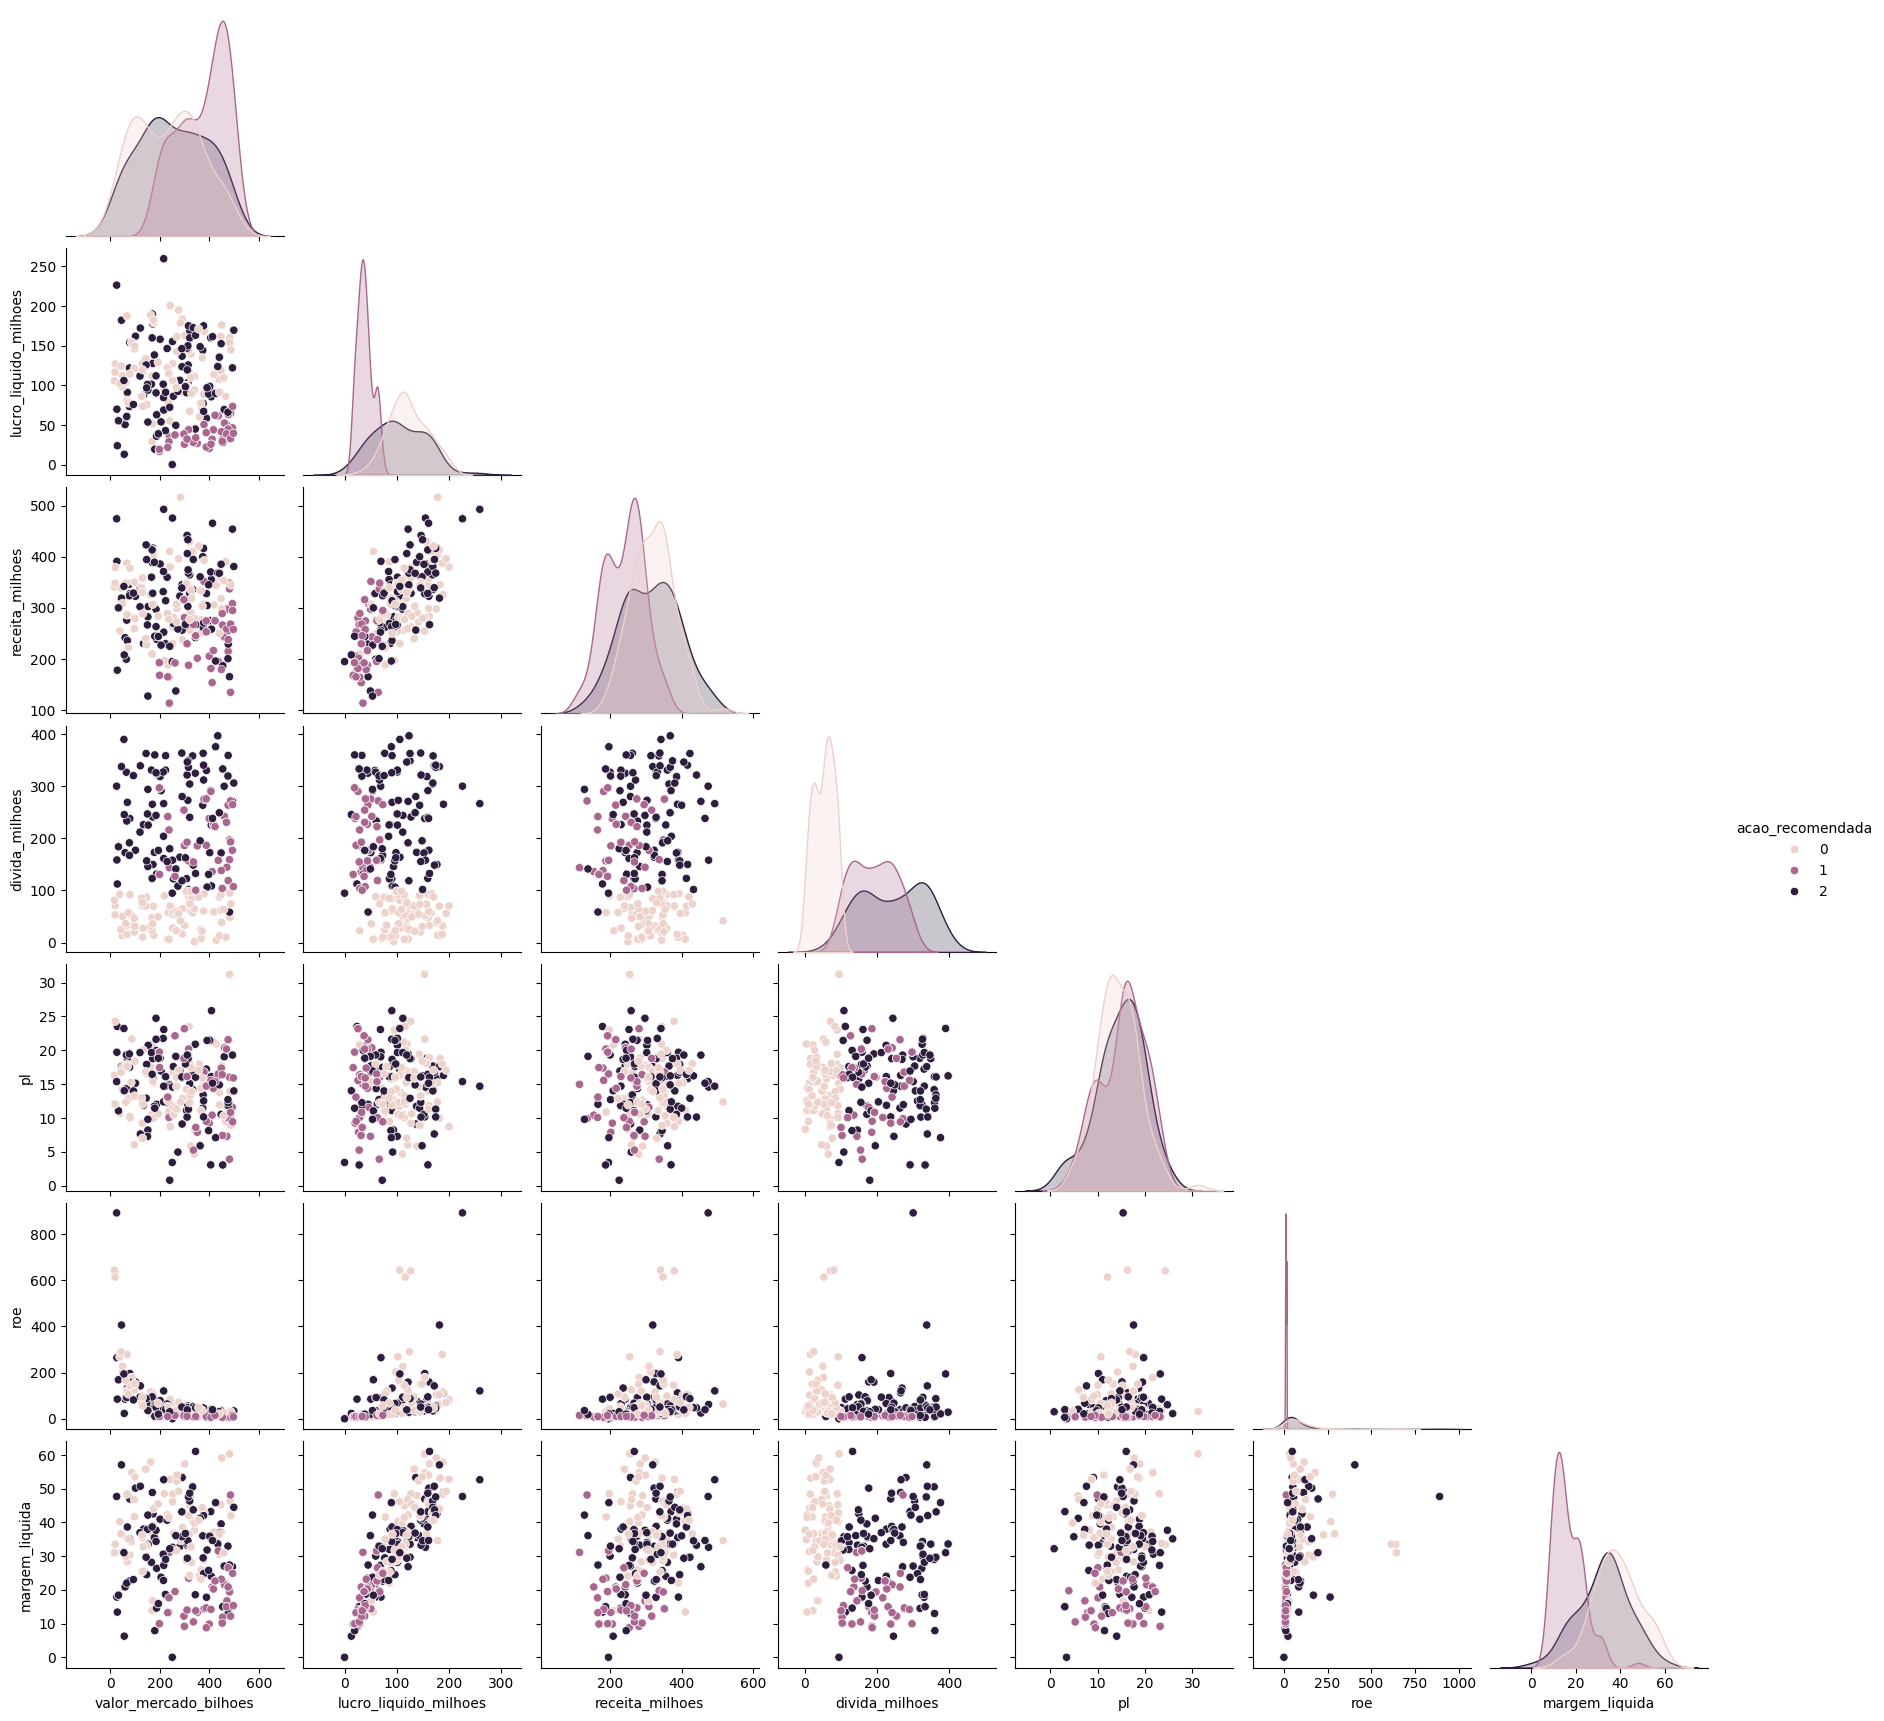

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

df_plot = x.copy()
df_plot["acao_recomendada"] = y

sns.pairplot(df_plot, hue="acao_recomendada", corner=True)
plt.show()


In [75]:
import joblib

# Salva o modelo em um arquivo .pkl
joblib.dump(model, "modelo_random_forest_acoes.pkl")
joblib.dump(L, "label_encoder_acoes.pkl")


['label_encoder_acoes.pkl']

Teste modelo

In [57]:
df.columns

Index(['valor_mercado_bilhoes', 'lucro_liquido_milhoes', 'receita_milhoes',
       'divida_milhoes', 'pl', 'roe', 'margem_liquida', 'acao_recomendada'],
      dtype='object')

In [58]:
values = [255.99,	-3.20,	116.47,	132.53,	18.36,	29.26,	28.60]

In [59]:
x = {}
for column, value in zip(df.columns, values):
    x[column] =value

In [60]:
x

{'valor_mercado_bilhoes': 255.99,
 'lucro_liquido_milhoes': -3.2,
 'receita_milhoes': 116.47,
 'divida_milhoes': 132.53,
 'pl': 18.36,
 'roe': 29.26,
 'margem_liquida': 28.6}

In [61]:
teste = pd.Series(x)

In [62]:
teste

valor_mercado_bilhoes    255.99
lucro_liquido_milhoes     -3.20
receita_milhoes          116.47
divida_milhoes           132.53
pl                        18.36
roe                       29.26
margem_liquida            28.60
dtype: float64

In [66]:
modelo_carregado = joblib.load("modelo_random_forest_acoes.pkl")

y_pred = modelo_carregado.predict(pd.DataFrame([x]))

In [68]:
result = {0: "comprar", 1: "manter", 2:"vender"}

In [76]:
L.inverse_transform(y_pred)

array(['Vender'], dtype=object)

In [72]:
result[y_pred.item()]

'vender'

In [2]:
import joblib
import pandas as pd

# Passo 1: Carrega o modelo e o LabelEncoder
modelo = joblib.load("modelo_random_forest_acoes.pkl")
le = joblib.load("label_encoder_acoes.pkl")

# Passo 2: Lista de dados para prever (exemplo com 5 registros)
dados_para_teste = [
    {
        "valor_mercado_bilhoes": 255.99,
        "lucro_liquido_milhoes": -3.20,
        "receita_milhoes": 116.47,
        "divida_milhoes": 132.53,
        "pl": 18.36,
        "roe": 29.26,
        "margem_liquida": 28.60,
    },
    # {
    #     "valor_mercado_bilhoes": 74.02,
    #     "lucro_liquido_milhoes": -32.57,
    #     "receita_milhoes": 106.81,
    #     "divida_milhoes": 88.17,
    #     "pl": 18.77,
    #     "roe": -0.01,
    #     "margem_liquida": -6.36,
    # },
    # {
    #     "valor_mercado_bilhoes": 60.43,
    #     "lucro_liquido_milhoes": 209.85,
    #     "receita_milhoes": 128.01,
    #     "divida_milhoes": 135.60,
    #     "pl": 16.65,
    #     "roe": 15.71,
    #     "margem_liquida": -14.79,
    # },
    # {
    #     "valor_mercado_bilhoes": 126.40,
    #     "lucro_liquido_milhoes": 130.33,
    #     "receita_milhoes": 114.84,
    #     "divida_milhoes": 94.70,
    #     "pl": 15.49,
    #     "roe": 19.62,
    #     "margem_liquida": 55.91,
    # },
    # {
    #     "valor_mercado_bilhoes": 120.49,
    #     "lucro_liquido_milhoes": 162.42,
    #     "receita_milhoes": 89.94,
    #     "divida_milhoes": 138.56,
    #     "pl": 13.89,
    #     "roe": -7.68,
    #     "margem_liquida": 57.25,
    # },
]

# Passo 3: Converte os dados para DataFrame
df_teste = pd.DataFrame(dados_para_teste)

# Passo 4: Faz a previsão
y_pred = modelo.predict(df_teste)

# Passo 5: Decodifica as classes
classes_previstas = le.inverse_transform(y_pred)

# Passo 6: Mostra o resultado
for i, classe in enumerate(classes_previstas, start=1):
    print(f"Empresa {i}: Recomendação → {classe}")


Empresa 1: Recomendação → Vender


In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("./Raisin_Dataset.csv")


In [4]:
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [17]:
y = df.Class
x = df.drop(columns=y.name)

In [9]:
x,y

(      Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
 0    87524       442.246011       253.291155      0.819738       90546   
 1    75166       406.690687       243.032436      0.801805       78789   
 2    90856       442.267048       266.328318      0.798354       93717   
 3    45928       286.540559       208.760042      0.684989       47336   
 4    79408       352.190770       290.827533      0.564011       81463   
 ..     ...              ...              ...           ...         ...   
 895  83248       430.077308       247.838695      0.817263       85839   
 896  87350       440.735698       259.293149      0.808629       90899   
 897  99657       431.706981       298.837323      0.721684      106264   
 898  93523       476.344094       254.176054      0.845739       97653   
 899  85609       512.081774       215.271976      0.907345       89197   
 
        Extent  Perimeter  
 0    0.758651   1184.040  
 1    0.684130   1121.786  
 2    0.637613

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
encodeing = LabelEncoder()

In [18]:
y = encodeing.fit_transform(y)

In [19]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_teste, x_treino, y_teste, y_treino = train_test_split(x, y, test_size=0.3, random_state=42)

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
from math import sqrt

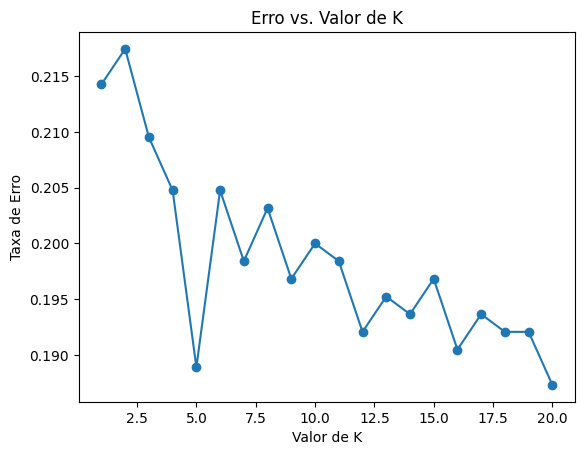

In [25]:
import matplotlib.pyplot as plt
import numpy as np

erro = []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_treino, y_treino)
    pred_k = knn.predict(x_teste)
    erro.append(np.mean(pred_k != y_teste))

plt.plot(range(1, 21), erro, marker='o')
plt.xlabel('Valor de K')
plt.ylabel('Taxa de Erro')
plt.title('Erro vs. Valor de K')
plt.show()

In [26]:



model = KNeighborsClassifier(20)

In [27]:
model.fit(x_treino, y_treino)

KNeighborsClassifier(n_neighbors=20)

In [28]:
pred_y = model.predict(x_teste)

In [29]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score

In [ ]:
ac = 
cm = 
ps = 
f1 = 

In [33]:
a = [accuracy_score(y_teste, pred_y),
confusion_matrix(y_teste, pred_y),
precision_score(y_teste, pred_y),
f1_score(y_teste, pred_y)]

In [ ]:
for i in a:
    print(i)

0.8126984126984127
[[244  77]
 [ 41 268]]
0.7768115942028986
0.8195718654434251


: 